<a href="https://colab.research.google.com/github/deepintomlf/mlfbook/blob/master/Chapter3_LinearRegression/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E5%92%8C%E6%AD%A3%E5%88%99%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **线性回归和正则化**

## **生成数据**

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

# 固定随机数种子
np.random.seed(0)

# 生成数据集样本
mu, sigma = 0, 0.5 # 均值和标准差
N = 1200 # 样本数
d = 800 # 输入维度
X = np.random.normal(mu, sigma, [N, d])
eps = np.random.normal(0, 0.5, [N, 1])
beta = np.zeros([d, 1], float)
beta[np.array([1, 5, 10]),0]  =  [1.0, 3.0, 2.7]
Y = np.dot(X, beta) + eps
Y_actual = np.dot(X, beta)
print(X)

# 划分训练集和测试集
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = 0.2)
Y_actual_train = np.dot( X_train, beta) 
Y_actual_test =  np.dot(X_test, beta)

[[ 0.88202617  0.2000786   0.48936899 ... -0.53854953 -0.21233165
  -0.4149823 ]
 [ 0.70558603  0.39290191 -0.02873476 ...  0.70607585 -0.69021538
  -0.26795728]
 [ 0.21538557 -0.0749458  -0.50301843 ...  0.32940107 -0.29845856
  -0.11147959]
 ...
 [-0.09182918  0.32351838 -0.77939252 ...  0.1389723   0.07962983
  -0.11293424]
 [ 0.70711592  0.47453808 -0.40274882 ...  0.47266018  0.37031403
  -0.31080675]
 [ 0.37935459 -0.05512685 -0.65408937 ...  0.75320713  0.30153274
  -1.03675019]]


## **普通最小二乘法**

r^2 on test data : 0.629388
rmse on test data : 1.222723


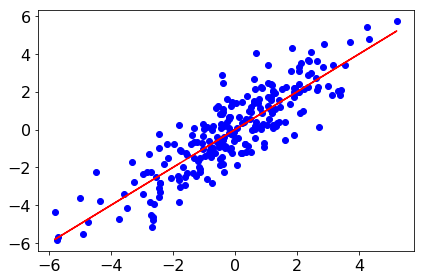

In [6]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import linear_model

linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(X_train, Y_train)
Y_test_pred = linear_model.predict(X_test)

# 绘制拟合结果的散点图
plt.scatter(Y_actual_test, Y_test_pred, color='b')
plt.plot(Y_actual_test, Y_actual_test, color='r')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

# 输出模型拟合优度指标
print("r^2 on test data : %f" % r2_score(Y_test, Y_test_pred))
print("rmse on test data : %f" % np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

## **岭回归**

r^2 on test data : 0.803307
rmse on test data : 0.890764


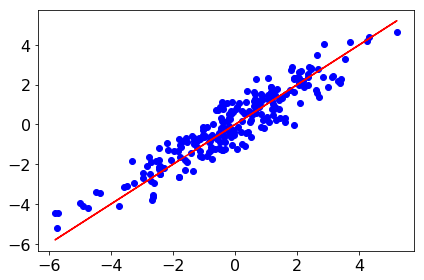

In [10]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV().fit(X_train, Y_train)
Y_test_pred_Ridge = ridgecv.predict(X_test)

plt.scatter(Y_actual_test, Y_test_pred_Ridge, color='b')
plt.plot(Y_actual_test, Y_actual_test, color ='r')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

print("r^2 on test data : %f" % r2_score(Y_test, Y_test_pred_Ridge))
print("rmse on test data : %f" % np.sqrt(mean_squared_error(Y_test, Y_test_pred_Ridge)))

10.0
(1, 800)


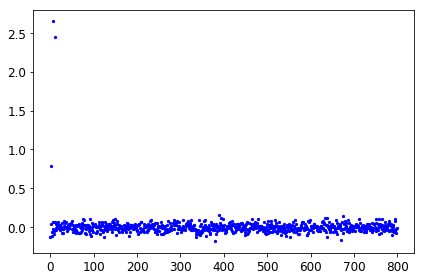

In [12]:
## 绘制非零系数图
print(ridgecv.alpha_)
coef = ridgecv.coef_
print(np.shape(coef)) 
plt.scatter(np.arange(np.shape(coef)[1]), coef.T, color='b', s=5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

## **套索回归**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


r^2 on test data : 0.931316
rmse on test data : 0.526378


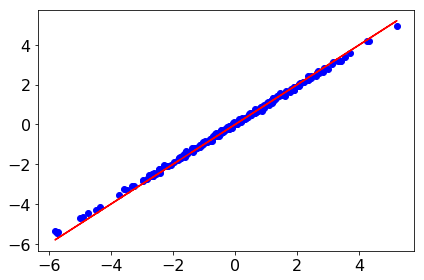

In [16]:
from sklearn.linear_model import Lasso, LassoCV

lassocv = LassoCV().fit(X_train, Y_train)
Y_test_pred_Lasso = lassocv.predict(X_test)
plt.scatter(Y_actual_test, Y_test_pred_Lasso, color='b')
plt.plot(Y_actual_test, Y_actual_test, color='r')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

r2_score_Lasso = r2_score(Y_test, Y_test_pred_Lasso)
print("r^2 on test data : %f" % r2_score_Lasso)
print("rmse on test data : %f" % np.sqrt(mean_squared_error(Y_test, Y_test_pred_Lasso)))


0.01926049926621277
(800,)
(array([  1,   5,  10, 197, 337, 464, 504, 512, 634, 765]),)


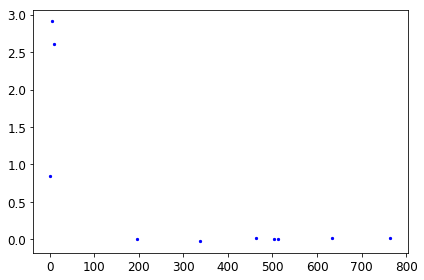

In [15]:
## 绘制非零系数图
print(lassocv.alpha_)
coef = lassocv.coef_
print(np.shape(coef))
non_zero_coef_index = np.where(np.abs(coef)> 0)
print(non_zero_coef_index)
plt.scatter(non_zero_coef_index, coef[non_zero_coef_index], color='b', s=5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()